# Transfer from walking to other tasks

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import jax.numpy as jnp
from qdax.utils.plotting import plot_2d_map_elites_repertoire
from scipy.stats import ranksums
%matplotlib inline

/home/giorgianadizar/miniconda3/envs/qdaxpy38/lib/python3.8/site-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/home/giorgianadizar/miniconda3/envs/qdaxpy38/lib/python3.8/site-packages/pkg_resources/__init__.py:2871: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('mpl_toolkits')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/home/giorgianadizar/miniconda3/envs/qdaxpy38/lib/python3.8/site-packages/pkg_resources/__init__.py:2871: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.decl

In [2]:
dfs = []
tasks = ["BridgeWalker-v0", "CustomPusher-v0", "UpStepper-v0", "DownStepper-v0", "ObstacleTraverser-v0",
         "ObstacleTraverser-v1", "Hurdler-v0", "PlatformJumper-v0", "GapJumper-v0", "CaveCrawler-v0",
         "CustomCarrier-v0",
         ]
samplings = ["all", "s1", "s2", "s3"]
repertoires = [f"g{i + 1}" for i in range(3)]
for task in tasks:
    for sampling in samplings:
        for rep in repertoires:
            for seed in range(10):
                tmp_df = pd.read_csv(f"../results/transfer/evo-body-10x10-floor-{sampling}_{seed}_{rep}_{task}.csv")
                tmp_df["seed"] = seed
                tmp_df["task"] = task
                tmp_df["sampling"] = sampling
                tmp_df["repertoire"] = rep
                dfs.append(tmp_df)
df = pd.concat(dfs)
df.head()

,max_fitness,coverage1,coverage2,coverage3,seed,task,sampling,repertoire
0,4.959429,16.308594,8.398438,3.222656,0,BridgeWalker-v0,all,g1
0,4.254878,20.898438,8.496094,3.613281,1,BridgeWalker-v0,all,g1
0,6.565206,17.480469,8.007812,3.906250,2,BridgeWalker-v0,all,g1
0,4.215802,15.234375,8.789062,3.613281,3,BridgeWalker-v0,all,g1
0,3.264956,17.187500,7.714844,2.246094,4,BridgeWalker-v0,all,g1


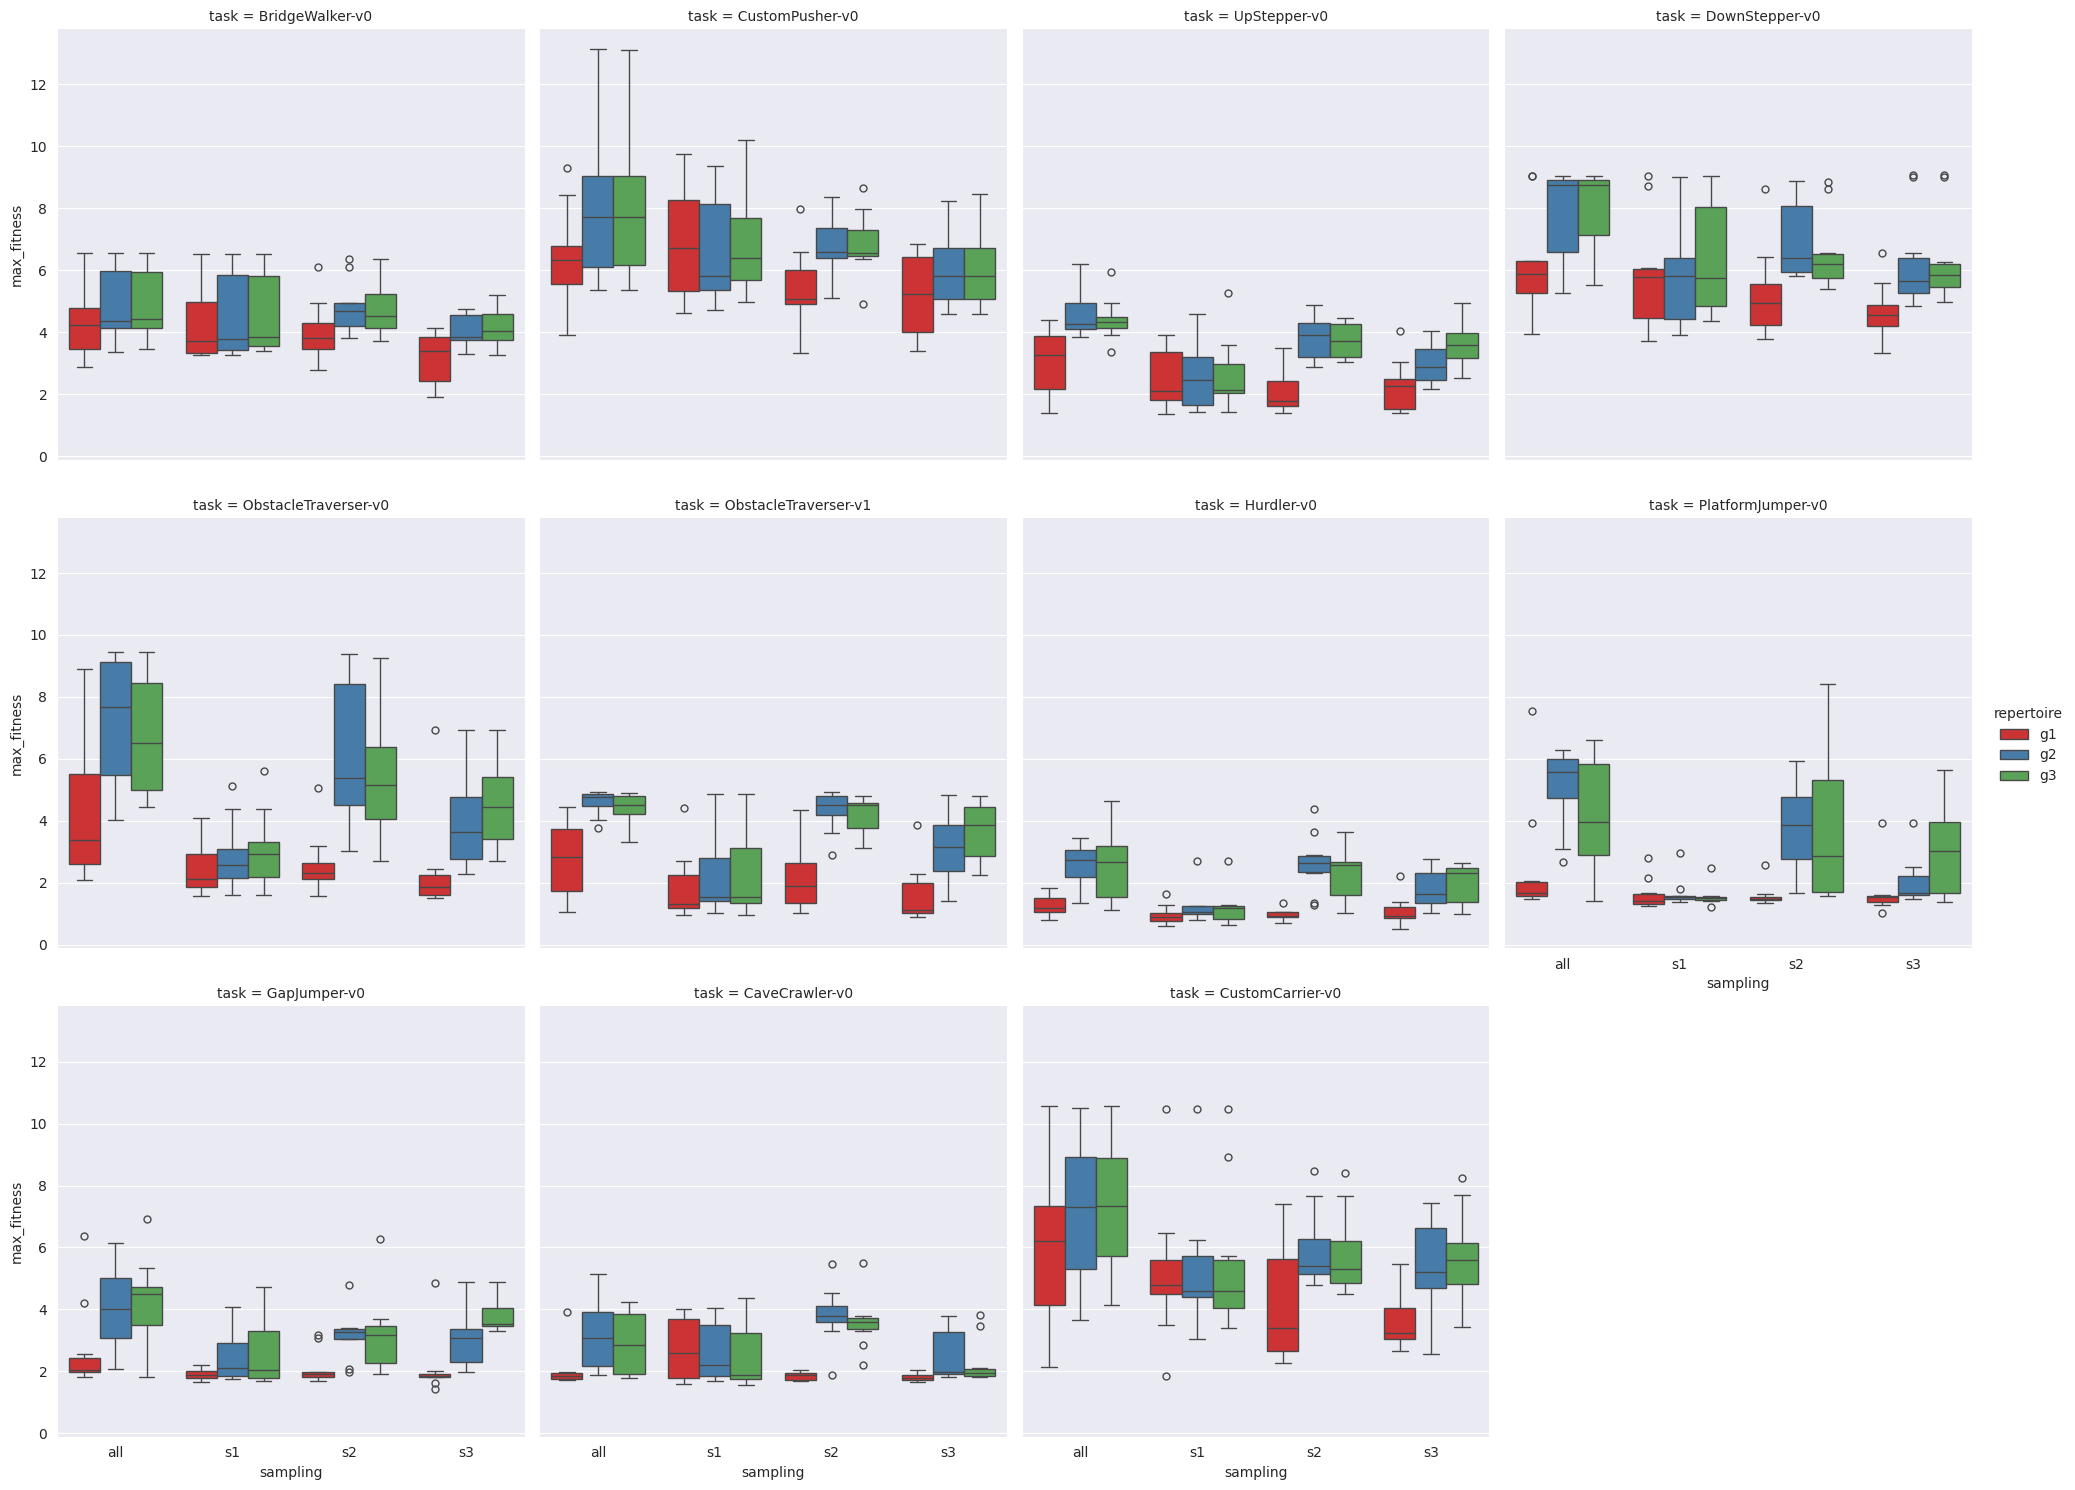

In [9]:
sns.catplot(df,
            x="sampling",
            y="max_fitness",
            col="task",
            col_wrap=4,
            hue="repertoire",
            palette="Set1",
            kind="box",
            )
plt.show()

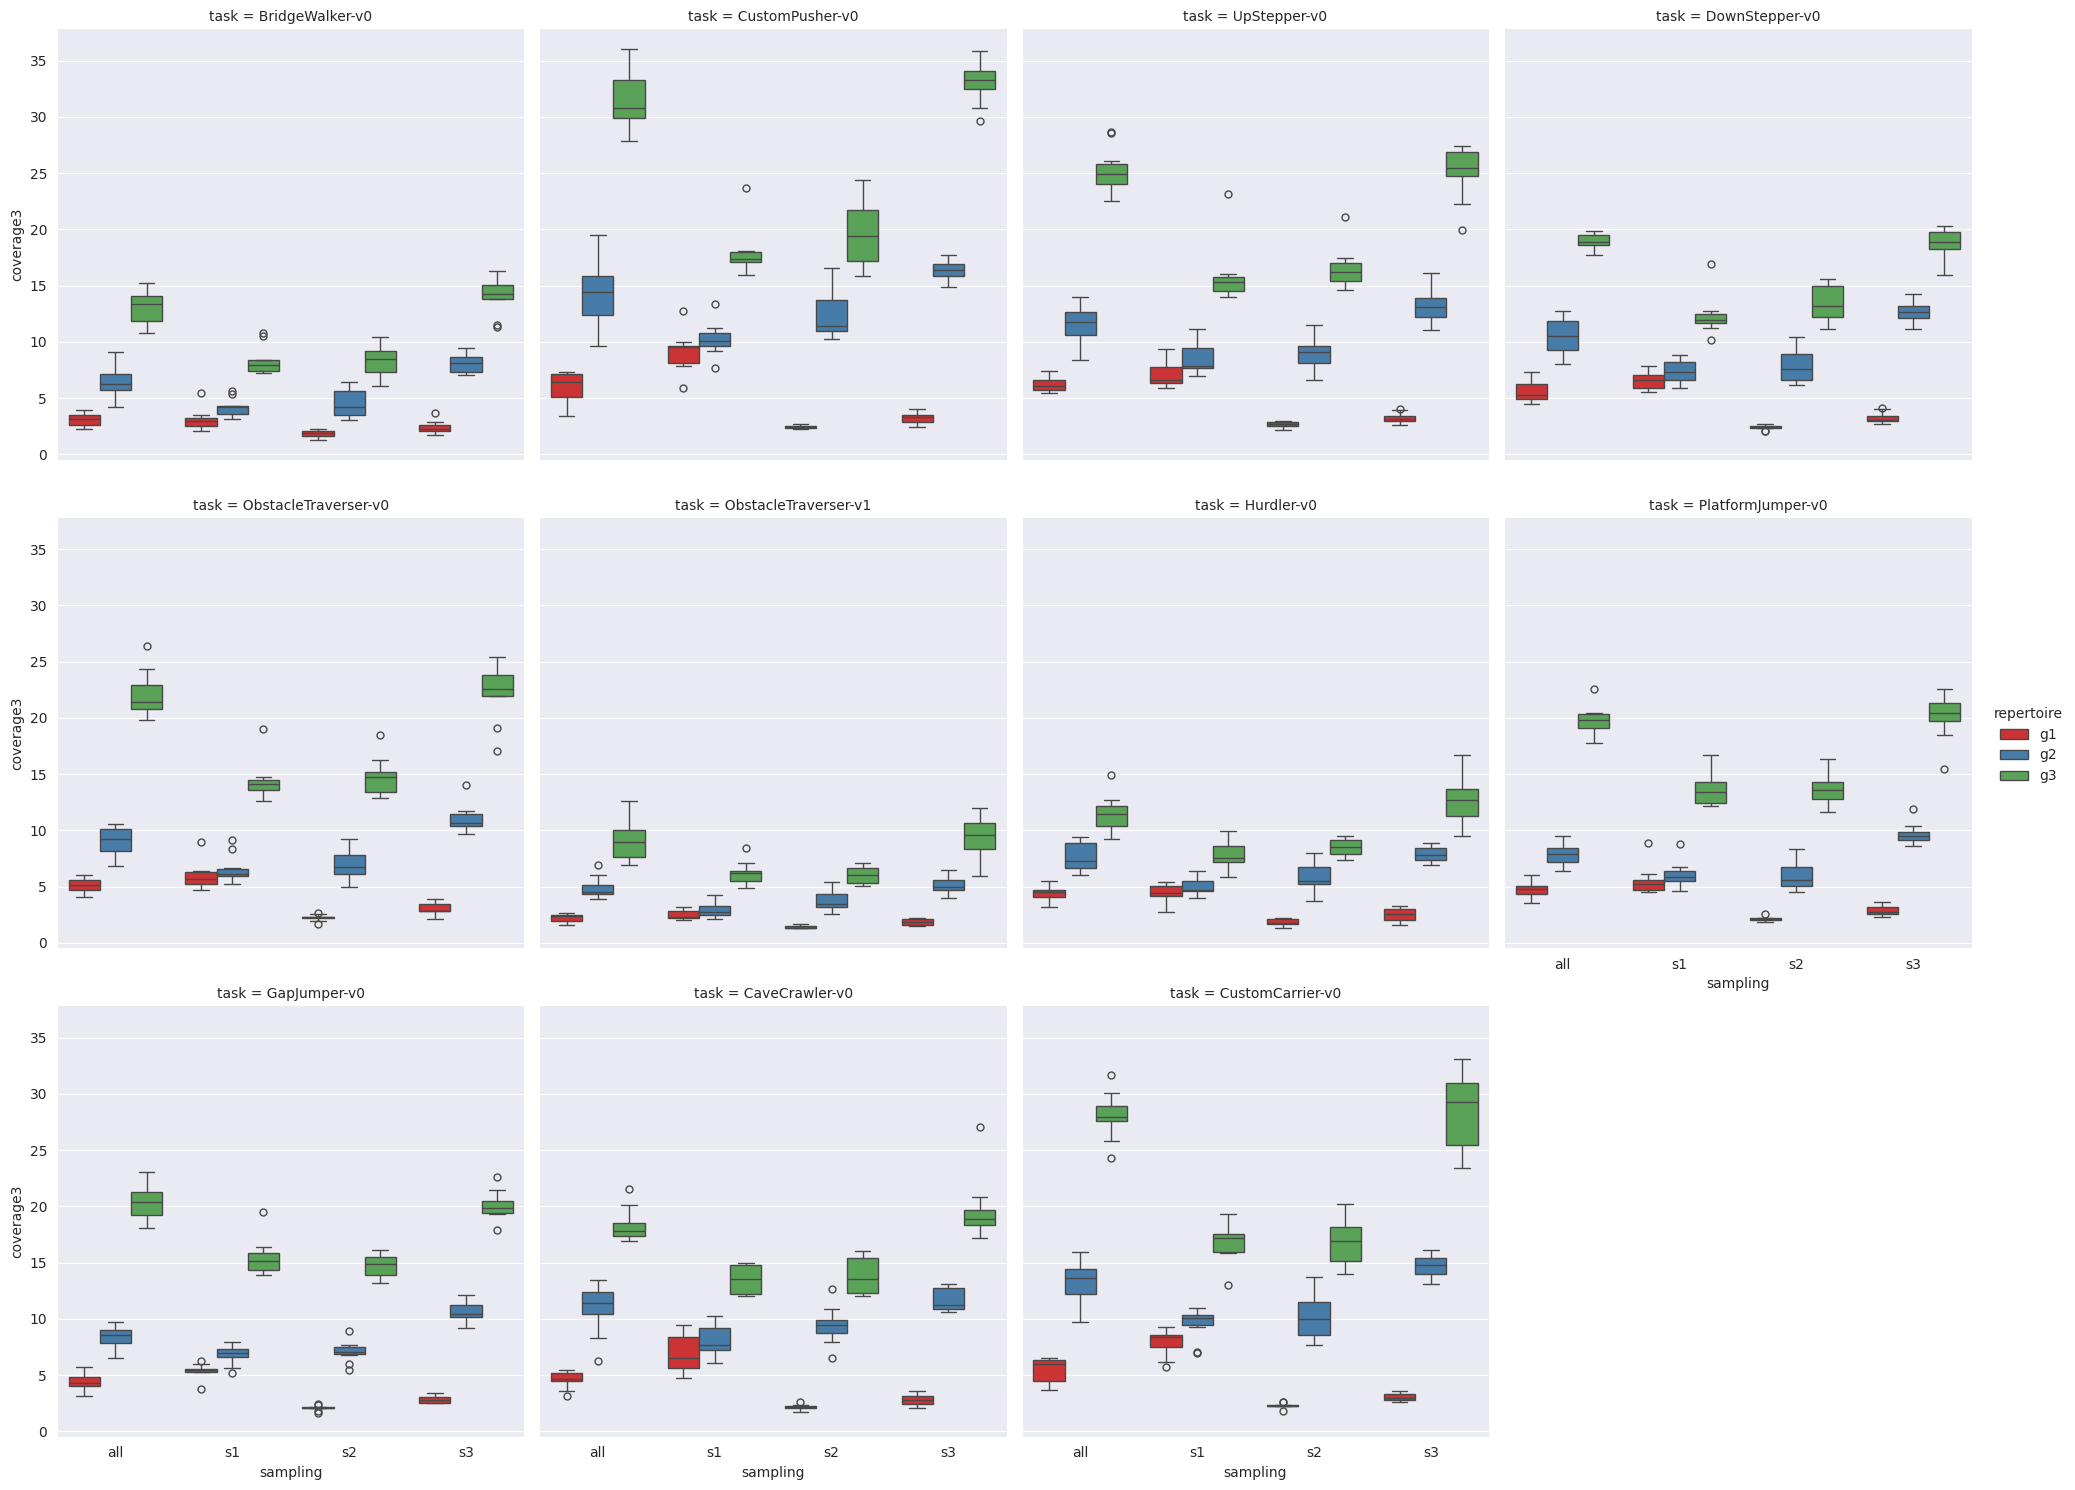

In [10]:
sns.catplot(df,
            x="sampling",
            y="coverage3",
            col="task",
            col_wrap=4,
            hue="repertoire",
            palette="Set1",
            kind="box",
            )
plt.show()